In [1]:
#1. CARGAR LIBRERÍAS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pycaret.classification import *
import shap

In [2]:
#2. CARGAR DATOS
df = pd.read_csv('02. Explora\caso6_prestamos_personales.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   edad                  260 non-null    int64  
 1   ingreso_mensual       260 non-null    int64  
 2   hist_crediticia       260 non-null    object 
 3   nivel_educativo       260 non-null    object 
 4   tiempo_laboral_meses  260 non-null    int64  
 5   cuota_vs_ingreso      260 non-null    float64
 6   default               260 non-null    int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 14.3+ KB


In [4]:
df['default'].value_counts()

default
0    239
1     21
Name: count, dtype: int64

In [5]:
df.describe(percentiles=[.1, .2, .3, .4, .5, .6, .7, .8, .9]).T

,count,mean,std,min,10%,20%,30%,40%,50%,60%,70%,80%,90%,max
edad,260.0,42.196154,12.346821,20.0,25.00,30.0,34.000,38.0,42.50,47.00,50.00,54.0,60.00,64.0
ingreso_mensual,260.0,4629.523077,1911.776728,1217.0,1786.40,2714.2,3503.400,4113.0,4788.50,5214.60,5930.40,6364.2,7382.00,7992.0
tiempo_laboral_meses,260.0,117.819231,69.888342,1.0,25.90,43.4,71.000,90.0,113.50,137.00,165.60,193.2,216.00,239.0
cuota_vs_ingreso,260.0,0.349462,0.144803,0.1,0.16,0.2,0.257,0.3,0.34,0.39,0.45,0.5,0.55,0.6
default,260.0,0.080769,0.273006,0.0,0.00,0.0,0.000,0.0,0.00,0.00,0.00,0.0,0.00,1.0


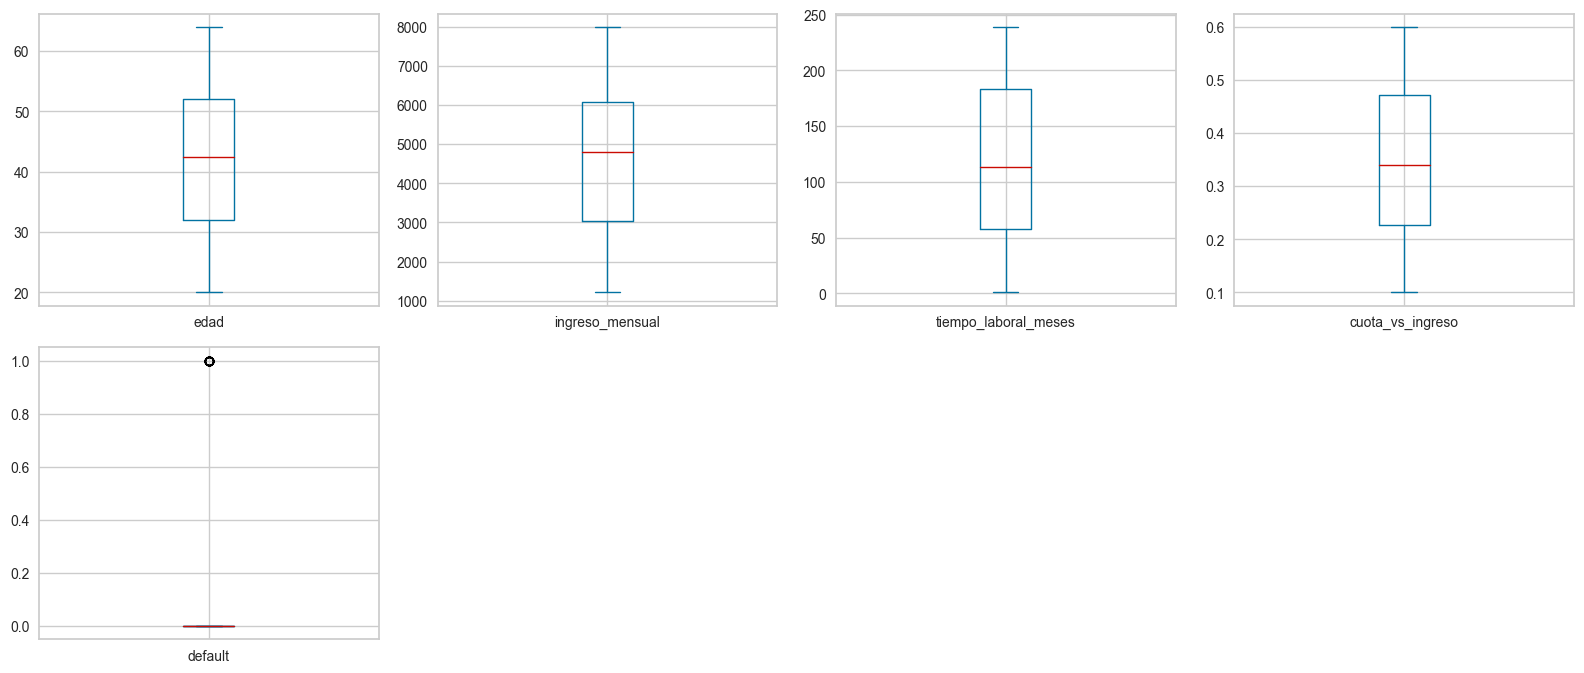

In [6]:
import matplotlib.pyplot as plt

# Seleccionar solo las columnas numéricas
numeric_cols = df.select_dtypes(include=['number']).columns

# Crear boxplots para todas las columnas numéricas
df[numeric_cols].plot(kind='box', subplots=True, layout=(3, 4), figsize=(16, 10), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

In [7]:
df.head()

,edad,ingreso_mensual,hist_crediticia,nivel_educativo,tiempo_laboral_meses,cuota_vs_ingreso,default
0,30,3926,Buena,Secundaria,53,0.32,0
1,59,6074,Buena,Secundaria,107,0.13,0
2,62,4739,Buena,Secundaria,22,0.25,0
3,34,2666,Buena,Universitario,68,0.49,0
4,53,5149,Mala,Universitario,21,0.11,0


In [ ]:
clf = setup(
    data=df,
    target='default',
    session_id=123,
    categorical_features=['hist_crediticia', 'nivel_educativo'],
    normalize=True,
    transformation=True,
    transformation_method='yeo-johnson',
    feature_selection=False, # lo desactivo para ver todas las variables
   # multicollinearity_threshold=0.95, # si quieres ser más estricto, baja este valor
    remove_multicollinearity=False,  # maneja ingreso vs cuota
    ignore_features=[],  # si quieres ignorar edad o educación directamente, se puede
    fold_strategy='stratifiedkfold',
    fold=5,
    fix_imbalance=True,  # balancea clases si default es minoría
    fix_imbalance_method= 'SMOTE', 
    verbose=False
)

In [9]:
# Comparar modelos automáticamente
best_model = compare_models(sort='Recall')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.7473,0.6649,0.5333,0.1820,0.2701,0.1657,0.1966,1.5620
svm,SVM - Linear Kernel,0.7419,0.6611,0.4667,0.1333,0.2061,0.0964,0.1348,0.0380
lr,Logistic Regression,0.7805,0.7336,0.4000,0.1730,0.2365,0.1366,0.1531,2.1040
ridge,Ridge Classifier,0.8135,0.7120,0.4000,0.1971,0.2599,0.1689,0.1847,0.0420
lda,Linear Discriminant Analysis,0.8189,0.7100,0.4000,0.2019,0.2643,0.1749,0.1905,0.0520
nb,Naive Bayes,0.8186,0.6690,0.3333,0.1800,0.2333,0.1412,0.1499,0.7860
ada,Ada Boost Classifier,0.8408,0.7294,0.3333,0.1900,0.2405,0.1576,0.1674,0.1180
gbc,Gradient Boosting Classifier,0.8461,0.7358,0.2667,0.1800,0.2143,0.1321,0.1359,0.0980
dt,Decision Tree Classifier,0.8408,0.5492,0.2000,0.1286,0.1543,0.0717,0.0748,0.0580
rf,Random Forest Classifier,0.8847,0.8075,0.2000,0.2000,0.2000,0.1414,0.1396,0.2220


In [10]:
#CREAR MODELO
model_inicial = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7838,0.5686,0.3333,0.1429,0.2000,0.0976,0.1093
1,0.7297,0.7157,0.3333,0.1111,0.1667,0.0513,0.0624
2,0.7222,0.7576,0.3333,0.1111,0.1667,0.0476,0.0580
3,0.8611,0.7576,0.3333,0.2500,0.2857,0.2105,0.2132
4,0.8056,0.8687,0.6667,0.2500,0.3636,0.2759,0.3223
Mean,0.7805,0.7336,0.4000,0.1730,0.2365,0.1366,0.1531
Std,0.0512,0.0969,0.1333,0.0639,0.0770,0.0912,0.1014


In [11]:
best_model = tune_model(model_inicial, optimize='Recall')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7027,0.5784,0.3333,0.1000,0.1538,0.0333,0.0422
1,0.6757,0.7059,0.3333,0.0909,0.1429,0.0177,0.0234
2,0.6944,0.7576,0.3333,0.1000,0.1538,0.0294,0.0374
3,0.8056,0.7879,0.3333,0.1667,0.2222,0.1250,0.1348
4,0.8056,0.8586,1.0000,0.3000,0.4615,0.3824,0.4862
Mean,0.7368,0.7377,0.4667,0.1515,0.2269,0.1175,0.1448
Std,0.0568,0.0937,0.2667,0.0791,0.1207,0.1379,0.1752


Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [ ]:
# Evaluar mejor modelo
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…